In [1]:
import LSEModel
import matplotlib.pylab as pl
import numpy as np
%load_ext autoreload
%autoreload 2

In [34]:
m = 1000
n = 100
k = 1
lbd=0.0001
options={'disp': 1, 'maxiter': 100}

In [35]:
lse = LSEModel.LSEModel()

In [36]:
# 创建真值
s = np.random.normal(1.5, 1.5, (m, k))
s[s < 0.0001] = 0.0001
a = np.random.normal(1.5, 1.5, (k, n))
a[a < 0.0001] = 0.0001
gm_s = np.random.normal(0, 0.16, (m, 1))
gm_q = np.random.normal(0, 0.16, (1, n))

u = np.zeros((m, n))
lse = LSEModel.LSEModel()
p = lse.prob(s=s, a=a, gm_s=gm_s, gm_q=gm_q)

rand = np.random.random(p.shape)

u[rand < p] = 1.0
u[rand >= p] = 0.0

In [37]:
# 初始化参数
inits = np.random.normal(1.5, 1.5, (m, k))
inits[inits < 0.0001] = 0.0001
inita = np.random.normal(1.5, 1.5, (k, n))
inita[inita < 0.0001] = 0.0001
initgm_s = np.random.normal(0, 0.01, (m, 1))
initgm_q = np.random.normal(0, 0.01, (1, n))

In [ ]:
bounds = [0, np.inf, 0.0001, np.inf, -0.4, 0.4, -0.4, 0.4]

In [18]:
# 运行算法,gamma_s、gamma_a的bound为[-0.4，0.4]
ss, aa, gms, gmq = lse.run(inits, inita, initgm_s, initgm_q, u, lbd=lbd, options=options, bounds=bounds)

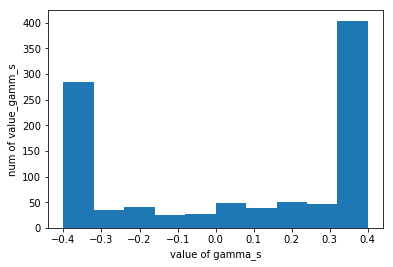

In [20]:
pl.hist(gms)
pl.xlabel('value of gamma_s')
pl.ylabel('num of value_gamm_s')
pl.show()

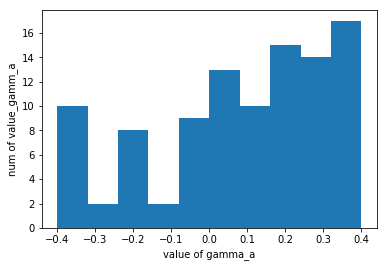

In [21]:
pl.hist(gmq.reshape(-1))
pl.xlabel('value of gamma_a')
pl.ylabel('num of value_gamm_a')
pl.show()

In [17]:
print u.shape, ss.shape

In [38]:
# 设置拟牛顿法界限
bounds = [0, np.inf, 0.0001, np.inf, -0.1, 0.1, -0.1, 0.1]

In [39]:
# 同时估计所有参数
ss, aa, gms, gmq = lse.run(inits, inita, initgm_s, initgm_q, u, lbd=lbd, options=options, bounds=bounds)

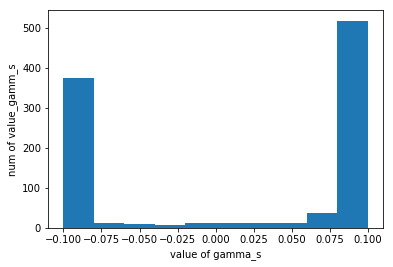

In [40]:
pl.hist(gms)
pl.xlabel('value of gamma_s')
pl.ylabel('num of value_gamm_s')
pl.show()

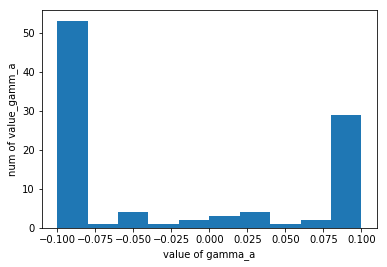

In [41]:
pl.hist(gmq.reshape(-1))
pl.xlabel('value of gamma_a')
pl.ylabel('num of value_gamm_a')
pl.show()

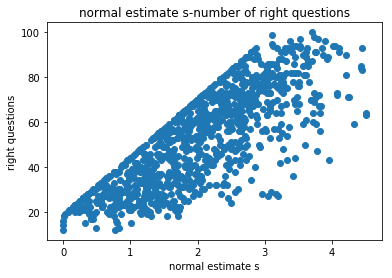

In [42]:
pl.scatter(ss.reshape(-1), np.sum(u, axis=1))
pl.title('normal estimate s-number of right questions')
pl.xlabel('normal estimate s')
pl.ylabel('right questions')
pl.show()

* 一维模型估计参数s与答对题数对照，有误差，但总体趋势与真实值基本相同

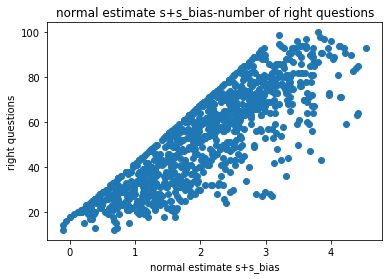

In [43]:
pl.scatter(ss.reshape(-1) + gms.reshape(-1), np.sum(u, axis=1))
pl.title('normal estimate s+s_bias-number of right questions')
pl.xlabel('normal estimate s+s_bias')
pl.ylabel('right questions')
pl.show()

* 一维模型估计参数s加gamma_s与答对题数对照，有误差，但总体趋势与真实值基本相同

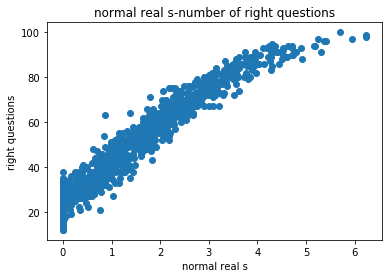

In [44]:
pl.scatter(s.reshape(-1), np.sum(u, axis=1))
pl.title('normal real s-number of right questions')
pl.xlabel('normal real s')
pl.ylabel('right questions')
pl.show()

* 一维模型真实s与答对题数正相关

In [45]:
reload(LSEModel)

In [48]:
# 固定其它参数估计学生能力
ss = lse.get_ability(inits, inita, initgm_s, initgm_q, u, lbd=lbd, options=options, bounds=bounds)

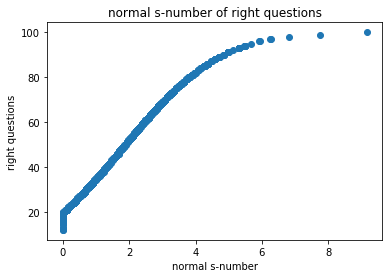

In [50]:
pl.scatter(ss.reshape(-1), np.sum(u, axis=1))
pl.title('normal s-number of right questions')
pl.xlabel('normal s-number')
pl.ylabel('right questions')
pl.show()

* （一维模型）学生能力与答对题的数量正相关

In [51]:
# 二维模型测试
m = 1000
n = 100
k = 2
lbd=0.0001
options={'disp': 1, 'maxiter': 100}

In [52]:
# 创建真值
s = np.random.normal(1.5, 1.5, (m, k))
s[s < 0.0001] = 0.0001
a = np.random.normal(1.5, 1.5, (k, n))
a[a < 0.0001] = 0.0001
gm_s = np.random.normal(0, 0.16, (m, 1))
gm_q = np.random.normal(0, 0.16, (1, n))

u = np.zeros((m, n))
lse = LSEModel.LSEModel()
p = lse.prob(s=s, a=a, gm_s=gm_s, gm_q=gm_q)

rand = np.random.random(p.shape)

u[rand < p] = 1.0
u[rand >= p] = 0.0
# np.savetxt('s.txt', s)
# np.savetxt('answer.txt', u, fmt='%i')

In [53]:
# 初始化参数
inits = np.random.normal(1.5, 1.5, (m, k))
inits[inits < 0.0001] = 0.0001
inita = np.random.normal(1.5, 1.5, (k, n))
inita[inita < 0.0001] = 0.0001
initgm_s = np.random.normal(0, 0.01, (m, 1))
initgm_q = np.random.normal(0, 0.01, (1, n))

In [54]:
bounds = [0, np.inf, 0.0001, np.inf, -0.4, 0.4, -0.4, 0.4]

In [55]:
# 运行算法,gamma_s、gamma_a的bound为[-0.4，0.4]
ss, aa, gms, gmq = lse.run(inits, inita, initgm_s, initgm_q, u, lbd=lbd, options=options, bounds=bounds)

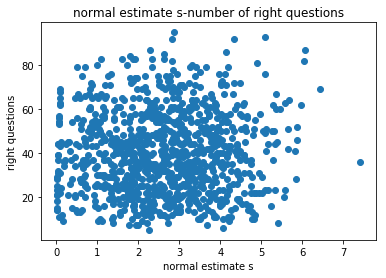

In [60]:
pl.scatter(np.linalg.norm(ss, axis=1), np.sum(u, axis=1))
# pl.scatter(ss.reshape(-1), np.sum(u, axis=1))
pl.title('normal estimate s-number of right questions')
pl.xlabel('normal estimate s')
pl.ylabel('right questions')
pl.show()

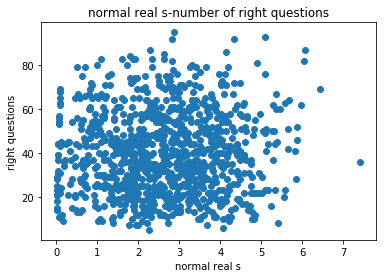

In [61]:
pl.scatter(np.linalg.norm(ss, axis=1), np.sum(u, axis=1))
# pl.scatter(s.reshape(-1), np.sum(u, axis=1))
pl.title('normal real s-number of right questions')
pl.xlabel('normal real s')
pl.ylabel('right questions')
pl.show()